<a href="https://colab.research.google.com/github/Asohail115/Ted-Talk-Views-Prediction/blob/main/Ted_Talk_Views_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**TED is devoted to spreading powerful ideas on just about any topic. These datasets contain over 4,000 TED talks including transcripts in many languages Founded in 1984 by Richard Salman as a nonprofit organization that aimed at bringing experts from the fields of Technology, Entertainment, and Design together, TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore, Jimmy Wales, Shahrukh Khan, and Bill Gates.**

##**Dataset Information**


*   Number of instances: 4,005
*  Number of attributes: 19

### **Features Information:**
### The dataset contains features like:

* **talk_id:** Talk identification number provided by TED
* **title:** Title of the talk
* **speaker_1:** First speaker in TED's speaker list
* **all_speakers:** Speakers in the talk
* **occupations:** Occupations of the speakers
* **about_speakers:** Blurb about each speaker
* **recorded_date:** Date the talk was recorded
* **published_date:** Date the talk was published to TED.com
* **event:** Event or medium in which the talk was given
* **native_lang:** Language the talk was given in
* **available_lang:** All available languages (lang_code) for a talk
* **comments:** Count of comments
* **duration:** Duration in seconds
* **topics:** Related tags or topics for the talk
* **related_talks:** Related talks (key='talk_id',value='title')
* **url:** URL of the talk
* **description:** Description of the talk
* **transcript:** Full transcript of the talk


---

###**Target Variable :**


*   **views**: Count of views


---

###**Goal: The main objective is to build a predictive model, which could help in predicting the views of the videos uploaded on the TEDx website.**

#**Project Work Flow**


---
1. Importing Libraries

2. Loading the Dataset

3. EDA on features

4. Feature Engineering

5. Data Cleaning

6. Feature selection

7. Regression models and HyperParameter Tuning

8. Comparison of Models

9. Final selection of the model

10. Conclusion


---






#**1.Importing all Necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import time
import datetime
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn import neighbors
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import ensemble
from wordcloud import WordCloud,ImageColorGenerator
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# ignoring warnings.
import warnings
warnings.filterwarnings('ignore')

##**After importing all necessary libraries we have to load the dataset.**
#**2. Loading the dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Ted-Talk-Views-Prediction Regression Machine Learning Project/data_ted_talks.csv")

##**Now, let's start EDA on features.**
#**3. EDA on Features**

In [4]:
df.head(5)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


In [5]:
df.tail(5)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
4000,62678,"Crisis support for the world, one text away",Nancy Lublin,{0: 'Nancy Lublin'},{0: ['health activist']},"{0: 'Nancy Lublin, cofounder and CEO of Crisis...",502934,2020-04-22,2020-04-27,TED2020: The Prequel,en,['en'],6.0,690,"['activism', 'data', 'technology', 'mental hea...",{2362: 'How data from a crisis text line is sa...,https://www.ted.com/talks/nancy_lublin_crisis_...,What if we could help people in crisis anytime...,"""I'm 14, and I want to go home."" ""My name is B..."
4001,62782,The dark history of IQ tests,Stefan C Dombrowski,{0: 'Stefan C Dombrowski'},NaN,NaN,307187,2020-04-27,2020-04-27,TED-Ed,en,"['en', 'es', 'my', 'pt-br']",NaN,346,"['TED-Ed', 'education', 'history', 'animation'...",{35386: 'How does the Rorschach inkblot test w...,https://www.ted.com/talks/stefan_c_dombrowski_...,"In 1905, psychologists Alfred Binet and Théodo...","In 1905, psychologists Alfred Binet and Théodo..."
4002,62263,"How ""policing for profit"" undermines your rights",Dick M. Carpenter II,{0: 'Dick M. Carpenter II'},{0: ['law researcher']},{0: 'Dick M. Carpenter II studies cutting edge...,464414,2019-06-22,2020-04-28,TEDxMileHigh,en,['en'],9.0,774,"['society', 'law', 'policy', 'justice system',...","{2406: 'I love being a police officer, but we ...",https://www.ted.com/talks/dick_m_carpenter_ii_...,"Many countries have an active, centuries-old l...",Picture yourself driving down the road tomorro...
4003,62784,The electrifying speeches of Sojourner Truth,Daina Ramey Berry,{0: 'Daina Ramey Berry'},NaN,NaN,56582,2020-04-28,2020-04-30,TED-Ed,en,['en'],NaN,257,"['TED-Ed', 'education', 'animation', 'United S...",{20973: 'The breathtaking courage of Harriet T...,https://www.ted.com/talks/daina_ramey_berry_th...,Isabella Baumfree was born into slavery in lat...,"In early 1828, Sojourner Truth approached the ..."
4004,62794,The most important anus in the ocean,Cella Wright,{0: 'Cella Wright'},NaN,NaN,0,2020-04-30,2020-04-30,TED-Ed,en,['en'],NaN,281,"['animals', 'TED-Ed', 'animation', 'oceans', '...","{62347: 'The bug that poops candy', 29159: 'In...",https://www.ted.com/talks/cella_wright_the_mos...,Is it a fuzzy sock? An overripe banana? A mold...,Can you guess what you’re looking at? Is it a ...


In [6]:
df.sample(5)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
2778,11363,How Baltimore called a ceasefire,Erricka Bridgeford,{0: 'Erricka Bridgeford'},{0: ['activist']},{0: 'Erricka Bridgeford intimately engages wit...,961984,2017-10-27,2018-05-08,TEDxMidAtlantic 2017,en,"['ar', 'en', 'es', 'fa', 'fr', 'it', 'ko', 'pt...",8.0,687,"['activism', 'violence', 'guns', 'death', 'cri...","{14608: ""A Parkland teacher's homework for us ...",https://www.ted.com/talks/erricka_bridgeford_h...,"In one day, in one city, in one neighborhood -...",There is a pastor in Baltimore. His name is Mi...
357,430,Organic algorithms in architecture,Greg Lynn,{0: 'Greg Lynn'},{0: ['designer']},"{0: 'Greg Lynn is the head of Greg Lynn FORM, ...",431953,2005-02-02,2009-01-09,TED2005,en,"['ar', 'bg', 'de', 'en', 'es', 'fr', 'he', 'it...",51.0,1134,['design'],{427: 'My journey in design'},https://www.ted.com/talks/greg_lynn_organic_al...,Greg Lynn talks about the mathematical roots o...,What I thought I would talk about today is the...
2525,2896,What I learned as a prisoner in North Korea,Euna Lee,{0: 'Euna Lee'},{0: ['journalist']},{0: 'Euna Lee strives to be a voice for the vo...,3494584,2016-10-29,2017-09-29,TEDxIndianaUniversity,en,"['ar', 'bg', 'de', 'el', 'en', 'fa', 'fr', 'he...",29.0,719,"['china', 'compassion', 'fear', 'humanity', 'j...","{1694: 'My escape from North Korea', 1771: 'Th...",https://www.ted.com/talks/euna_lee_what_i_lear...,"In March 2009, North Korean soldiers captured ...",I recently read about what the young generatio...
2335,2691,The racial politics of time,Brittney Cooper,{0: 'Brittney Cooper'},{0: ['cultural theorist']},{0: 'With scholarship and incisive commentary ...,887994,2016-10-26,2017-02-21,TEDWomen 2016,en,"['ar', 'ca', 'da', 'en', 'es', 'fr', 'it', 'ja...",100.0,749,"['criminal justice', 'culture', 'history', 'hu...",{2646: 'How students of color confront imposto...,https://www.ted.com/talks/brittney_cooper_the_...,Cultural theorist Brittney Cooper examines rac...,"What if I told you that time has a race, a rac..."
2696,12346,The genius of the London Tube Map,Michael Bierut,{0: 'Michael Bierut'},"{0: ['designer', 'critic']}",{0: 'Michael Bierut is a partner in the New Yo...,1087526,2018-03-15,2018-03-15,Small Thing Big Idea,en,"['ar', 'bg', 'ca', 'cs', 'de', 'el', 'en', 'es...",17.0,194,"['design', 'map', 'transportation', 'history']","{12349: 'How the progress bar keeps you sane',...",https://www.ted.com/talks/michael_bierut_the_g...,Design legend Michael Bierut tells the story o...,"The history of civilization, in some ways, is ..."


In [7]:
df.shape

(4005, 19)

**we have 4005 records and 19 features**

**Target variable is views**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

* **we have total 4 numerical columns in our dataset out of which 1 is our target variable.**

* **Rest all columns are either categorical or they contains textual data.**

* **So, we will try to generate some numerical columns from these columns.**

In [9]:
df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript'],
      dtype='object')

In [10]:
df.describe()

,talk_id,views,comments,duration
count,4005.000000,4.005000e+03,3350.000000,4005.000000
mean,12432.538327,2.148006e+06,161.997015,724.011236
std,17447.576262,3.451226e+06,268.838922,361.775462
min,1.000000,0.000000e+00,0.000000,60.000000
25%,1252.000000,8.820690e+05,38.000000,393.000000
50%,2333.000000,1.375508e+06,89.000000,738.000000
75%,23777.000000,2.133110e+06,188.000000,974.000000
max,62794.000000,6.505195e+07,6449.000000,3922.000000


##**3.1 Now Checking for duplicated rows.**

In [11]:
df.duplicated().sum()

0

**we have zero duplicated rows in our dataset**

##**3.2 Checking for null values**

In [12]:
df.isnull().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

###**Heatmap to check missing data in dataset**

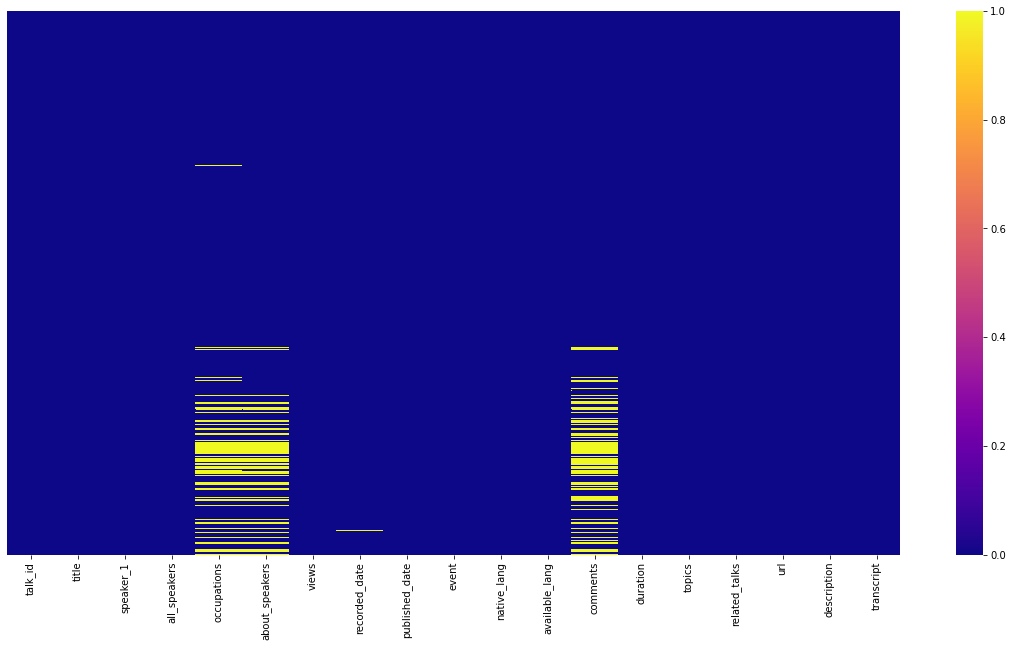

In [13]:
plt.rcParams["figure.figsize"] = (20,10)
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap="plasma")

**From the above analysis**

**The dataset contains NaN values in few columns like:**

* **all_speakers**
* **occupations**
* **about_speakers**
* **recorded_date**
* **comments**

##**3.3 exploring some column**

**Let's see speaker of Top 10 most watched videos**

In [14]:
pop_df = df.nlargest(10,["views"])
pop_df[["speaker_1","views","title"]]

,speaker_1,views,title
4,Sir Ken Robinson,65051954,Do schools kill creativity?
1296,Amy Cuddy,57074270,Your body language may shape who you are
2062,James Veitch,56932551,This is what happens when you reply to spam email
646,Simon Sinek,49730580,How great leaders inspire action
796,Brené Brown,47544833,The power of vulnerability
1724,Julian Treasure,41504331,How to speak so that people want to listen
2108,Tim Urban,37976820,Inside the mind of a master procrastinator
1366,Cameron Russell,33874546,"Looks aren't everything. Believe me, I'm a model."
2724,Sam Berns,33691484,My philosophy for a happy life
1898,Bill Gates,33521780,The next outbreak? We're not ready


###**Most popular videos bar plot analysis**

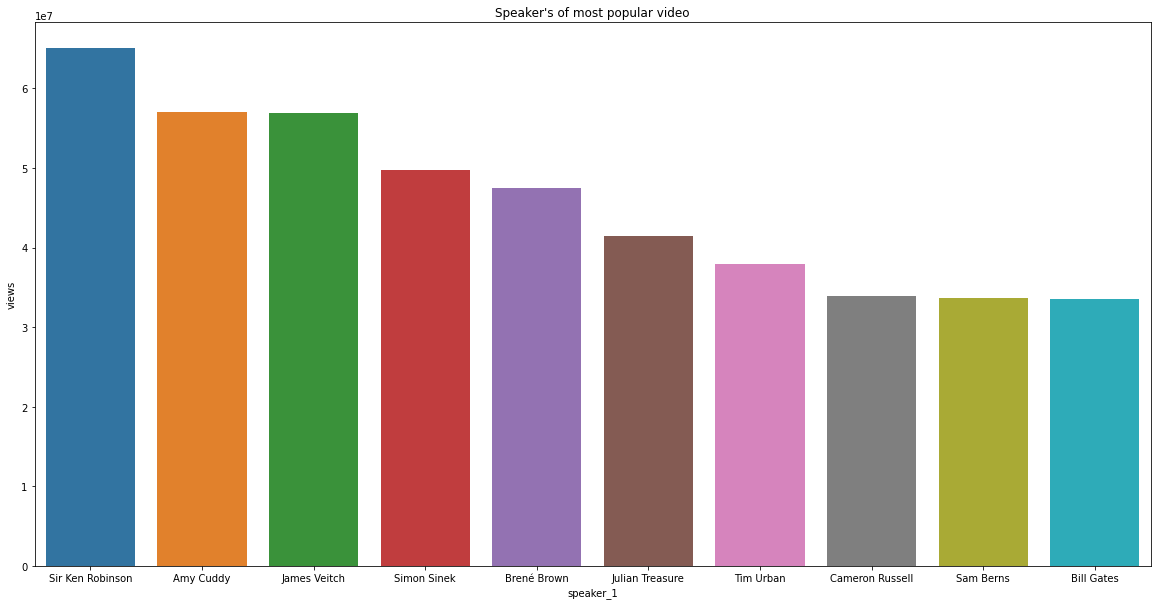

In [15]:
plt.figure(figsize=(20,10))
plt.title("Speaker's of most popular video")
sns.barplot(x="speaker_1",y="views",data=pop_df)

* **from the above plot we can see that "Do Schools Kill Creativity?" is the most popular TED Talk of all time with more than 65 million views whose speaker is Sir Ken Robinson.**

* **If we talk about more than 60 million views then there is only one talk that has crossed 60 million mark while 3 talks have crossed 50 million mark.**

##**Let's find the most popular speaker**

In [16]:
pop_speaker_df=df.groupby('speaker_1').agg({'views' : 'sum'}).nlargest(10,['views'])
pop_speaker_df.reset_index(inplace=True)
pop_speaker_df

,speaker_1,views
0,Alex Gendler,117619583
1,Sir Ken Robinson,84380518
2,James Veitch,78843641
3,Simon Sinek,62661183
4,Brené Brown,61285977
5,Bill Gates,57107176
6,Amy Cuddy,57074270
7,Julian Treasure,54799681
8,Hans Rosling,39871561
9,Tim Urban,37976820


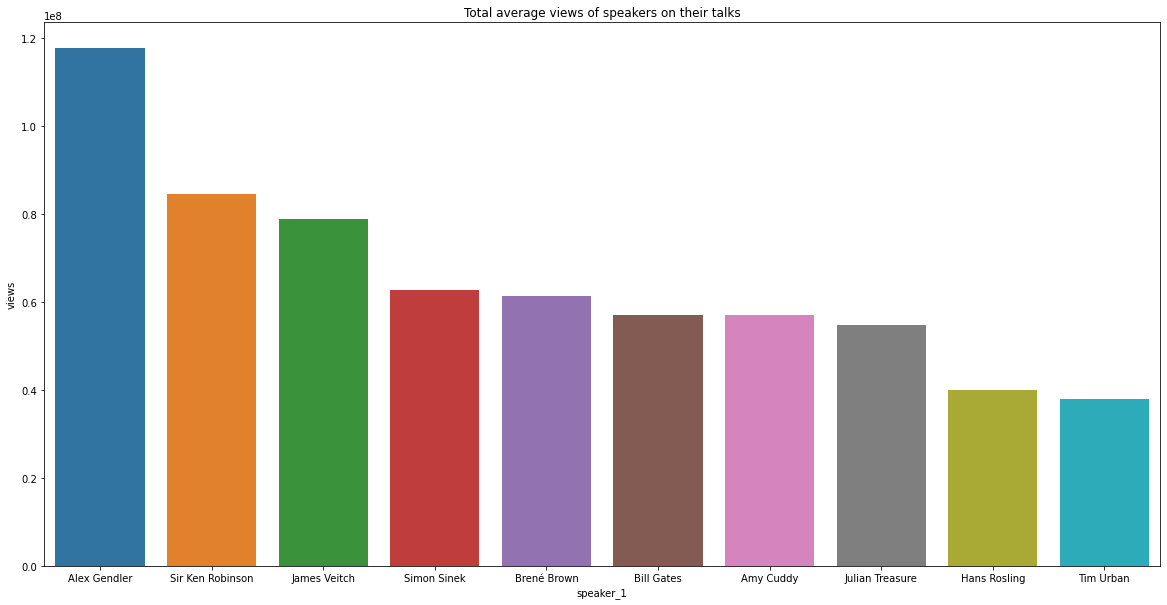

In [17]:
plt.figure(figsize=(20,10))
plt.title("Total average views of speakers on their talks")
sns.barplot(x='speaker_1',y='views',data=pop_speaker_df)

* **Alex Gendler is the most popular speaker**

##**Let's Explore Event column**

In [18]:
df["event"].nunique()

459

**we have total 459 unique event entries**

###**Checking the msost frequent event category**

In [19]:
freq_event_df=df[['event','views']].groupby('event').agg({'views' : 'count'}).nlargest(10,['views'])
freq_event_df.reset_index(inplace=True)
freq_event_df

,event,views
0,TED-Ed,556
1,TED2017,96
2,TED2018,96
3,TED2019,91
4,TED2014,84
5,TED2009,81
6,TED2013,75
7,TED2015,75
8,TED2016,75
9,TED2011,70


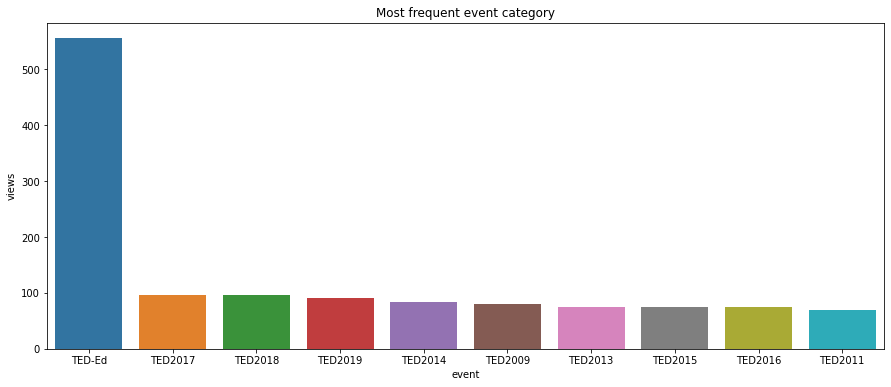

In [20]:
plt.figure(figsize=(15,6))
plt.title('Most frequent event category')
sns.barplot(x='event',y='views',data=freq_event_df)

###**so,the most frequent event category is TED-Ed**

##**Checking the msost Popular event category**

In [21]:
 pop_event_df = df[["event","views"]].groupby("event").agg({"views":"sum"}).nlargest(10,["views"])
 pop_event_df.reset_index(inplace=True)

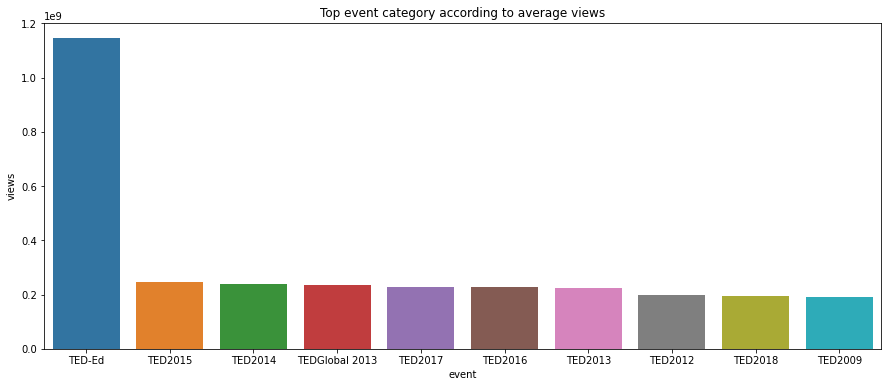

In [22]:
plt.figure(figsize=(15,6))
plt.title('Top event category according to average views')
sns.barplot(x='event',y='views',data=pop_event_df)

**TED-Ed is the most popular event by having maximum views**

## **Let's explore the title column**

There are 157160 words in the combination of all titles.


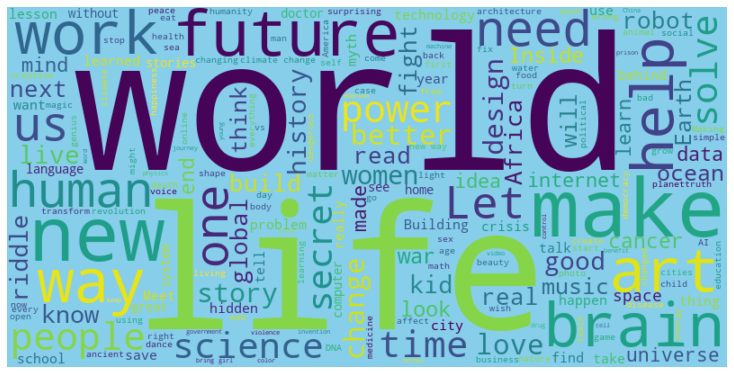

In [23]:
# Making of word cloud from title column

text = " ".join(topic for topic in df.title.astype(str))
print ("There are {} words in the combination of all titles.".format(len(text)))


# Create and generate a word cloud image:

wordcloud = WordCloud(background_color="skyblue", width=800, height=400).generate(text)

plt.rcParams["figure.figsize"] = (15,5)
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

* **here majority of Titles contains words like world,make,life,future,new,art,help,way**


##**Now let's visualise mot popular Topics**

There are 404126 words in the combination of all topics.


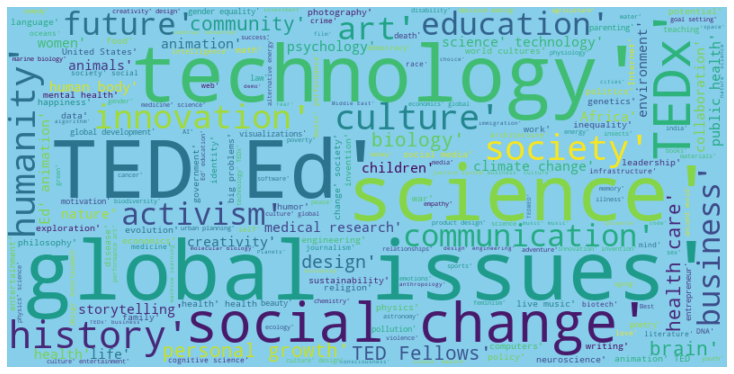

In [24]:
# Making of word cloud from topics column

text = " ".join(topic for topic in df.topics.astype(str))
print ("There are {} words in the combination of all topics.".format(len(text)))


# Create and generate a word cloud image:

wordcloud = WordCloud(background_color="skyblue", width=800, height=400).generate(text)

plt.rcParams["figure.figsize"] = (15,5)
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

**Here Most popular topic tags are TED Ed,technology, global issues, science, humanity**

##**Let's explore published_date**

###applying strptime on published_date column

In [25]:
type("published_date")

str

In [26]:
df.dtypes

talk_id             int64
title              object
speaker_1          object
all_speakers       object
occupations        object
about_speakers     object
views               int64
recorded_date      object
published_date     object
event              object
native_lang        object
available_lang     object
comments          float64
duration            int64
topics             object
related_talks      object
url                object
description        object
transcript         object
dtype: object

In [27]:
import datetime
df['published_date'] = df['published_date'].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d"))

###Extracting release day, month and year from the published date column

In [28]:
df['release_day'] = df['published_date'].apply(lambda x: x.weekday())
df['release_month']=df['published_date'].apply(lambda x: x.month)
df['release_year'] = df['published_date'].apply(lambda x: x.year)

**I have extracted weekday month and year from published_date column and added three separate columns as follows:**

* **release_day**
* **release_month**
* **release_year**

##**Let's explore release_day column.**

### Encoding of release_day column with corresponding week day name

In [29]:
week_day={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
df['release_day']=df['release_day'].map(week_day)

### Checking the day of the month having maximum release date 

In [30]:
freq_rel_day=df[['release_day','views']].groupby('release_day').agg({'views' : 'count'})
freq_rel_day=freq_rel_day.sort_values('views',ascending=False)
freq_rel_day.reset_index(inplace=True)
freq_rel_day

,release_day,views
0,Tuesday,857
1,Thursday,832
2,Friday,789
3,Monday,727
4,Wednesday,703
5,Sunday,55
6,Saturday,42


### Barplot to show the day of the week having maximum release date 


Text(0.5, 1.0, 'Most frequent release days')

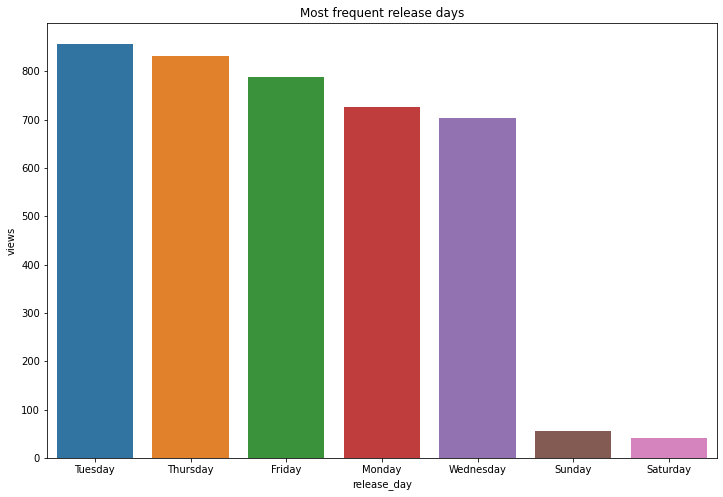

In [31]:
plt.figure(figsize=(12,8))
sns.barplot(x='release_day',y='views',data=freq_rel_day)
plt.title('Most frequent release days')

**Here Most videos are published on Tuesday followed by Thursday.**

##**Let's check the best release day of the week with respect to average views**

### Extracting the best release day of the week w.r.t. average views


In [32]:
pop_rel_day=df[['release_day','views']].groupby('release_day').agg({'views' : 'mean'})
pop_rel_day=pop_rel_day.sort_values('views',ascending=False)
pop_rel_day.reset_index(inplace=True)

###Barplot to show released week days having maximum views.

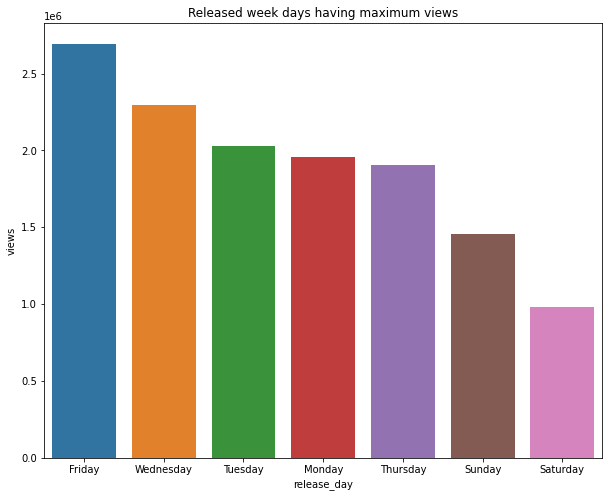

In [33]:
plt.figure(figsize=(10,8))
plt.title('Released week days having maximum views')
sns.barplot(x='release_day',y='views',data=pop_rel_day)

* **Most videos are published on Tuesday followed by Thursday.**
* **Friday release is impacting the views of the video**

##**Exploring Release_month column**

### Encoding of release_month column with corresponding month name

In [34]:
month_dict={1:'Jan',2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
df['release_month']=df['release_month'].map(month_dict)

### Let's check months having maximum release 

In [35]:
freq_rel_month=df[['release_month','views']].groupby('release_month').agg({'views' : 'count'})
freq_rel_month=freq_rel_month.sort_values('views',ascending=False)
freq_rel_month.reset_index(inplace=True)

### Barplot showing month having most frequent release. 

Text(0.5, 1.0, 'Most frequent release months')

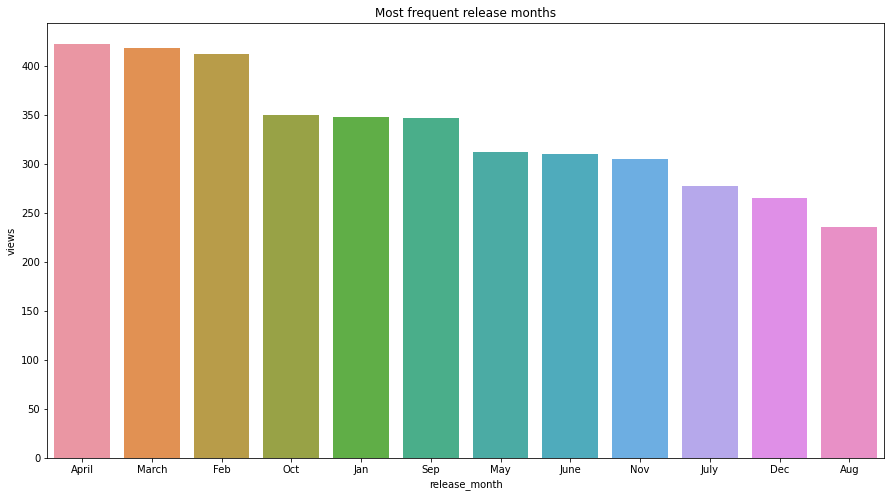

In [36]:
plt.figure(figsize=(15,8))
sns.barplot(x='release_month',y='views',data=freq_rel_month)
plt.title('Most frequent release months')

### Most videos are released in April followed by March and Feb.

### **Let's find the release month having maximum average views.**

###Checking the most popular release month according to average Views

In [37]:
pop_rel_month=df[['release_month','views']].groupby('release_month').agg({'views' : 'mean'})
pop_rel_month=pop_rel_month.sort_values('views',ascending=False)
pop_rel_month.reset_index(inplace=True)

### Barplot showing months having maximum average views.

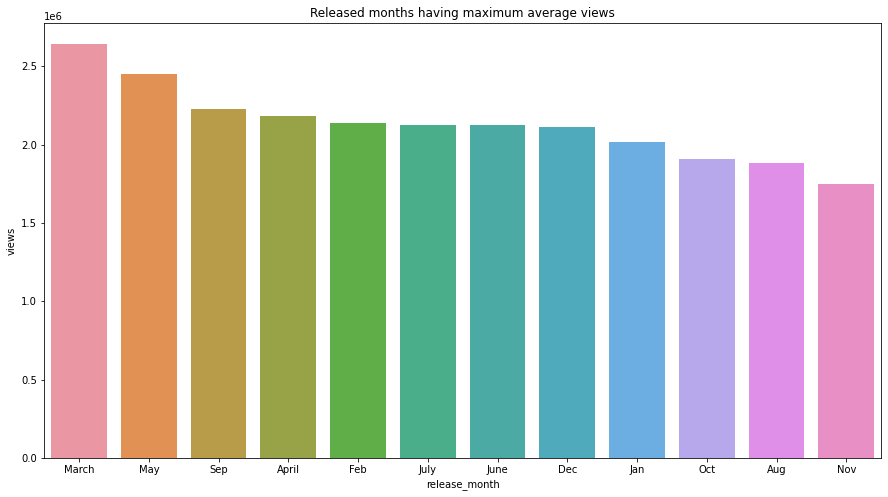

In [38]:
plt.figure(figsize=(15,8))
plt.title('Released months having maximum average views')
sns.barplot(x='release_month',y='views',data=pop_rel_month)

###Videos released in March month are more popular i.e. have more average views.

##**Let's explore release_year column.**

### Checking years having maximum release 

In [39]:
freq_rel_year=df[['release_year','views']].groupby('release_year').agg({'views' : 'count'})
freq_rel_year=freq_rel_year.sort_values('views',ascending=False)
freq_rel_year.reset_index(inplace=True)

### Barplot to show most frequent release years 

Text(0.5, 1.0, 'Most frequent release years')

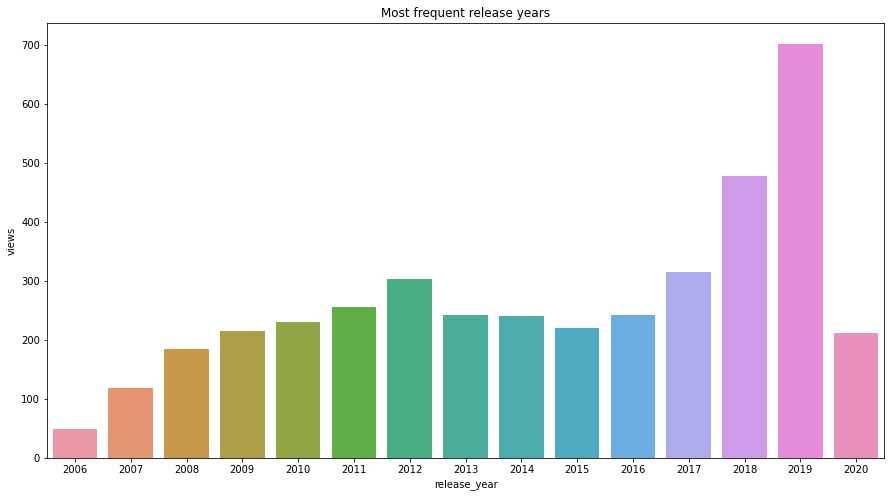

In [40]:
plt.figure(figsize=(15,8))
sns.barplot(x='release_year',y='views',data=freq_rel_year)
plt.title('Most frequent release years')

###Most videos are published in 2019 followed by 2018.

###**fining the release year having maximum average views.**

### Extracting the most popular release years w.r.t. average Views

In [41]:
pop_rel_year=df[['release_year','views']].groupby('release_year').agg({'views' : 'mean'})
pop_rel_year=pop_rel_year.sort_values('views',ascending=False)
pop_rel_year.reset_index(inplace=True)

### Barplot to show year which have maximum average views.

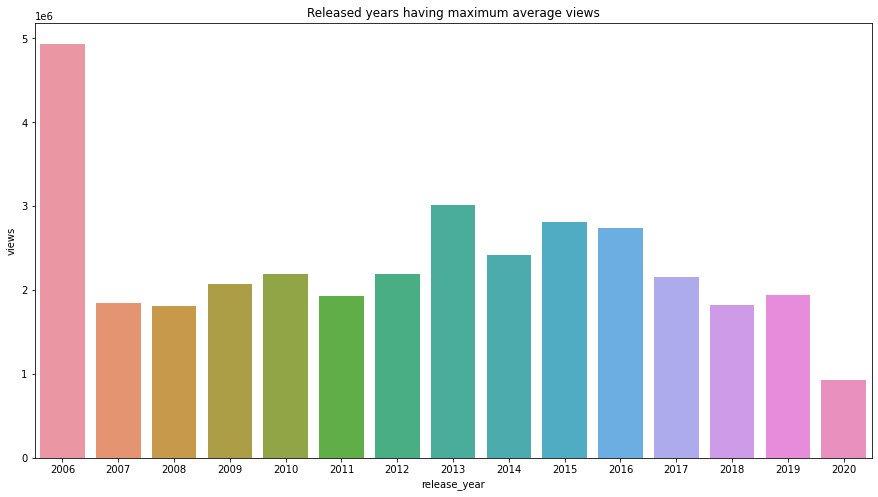

In [42]:
plt.figure(figsize=(15,8))
plt.title('Released years having maximum average views')
sns.barplot(x='release_year',y='views',data=pop_rel_year)

###Videos published in 2006 have high number of views.

##**Let's Explore Views column**

**Views is our target as well as numerical variable. So, let's check its distribution.**

### Plotting Distplot of views column

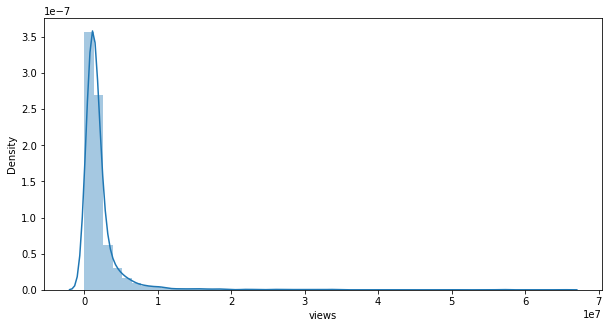

In [43]:
plt.figure(figsize=(10,5))
sns.distplot(df['views'])

###so,here the distribution of target variable is rightly skewed.

##**Let's check the distribution of comments column.**

###Plotting Distplot of comments column

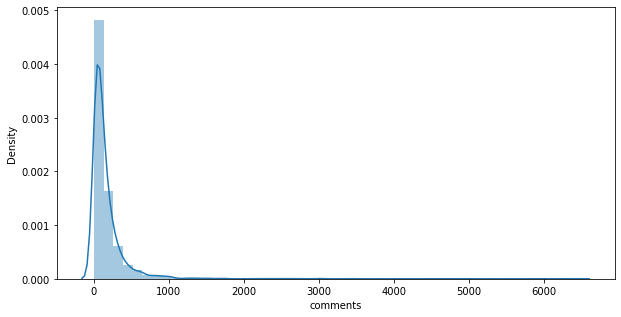

In [44]:
plt.figure(figsize=(10,5))
sns.distplot(df['comments'])

### The distribution of comments column is also rightly skewed.

##**Let's check the distribution of Duration column.**

### Plotting Distplot of duration column

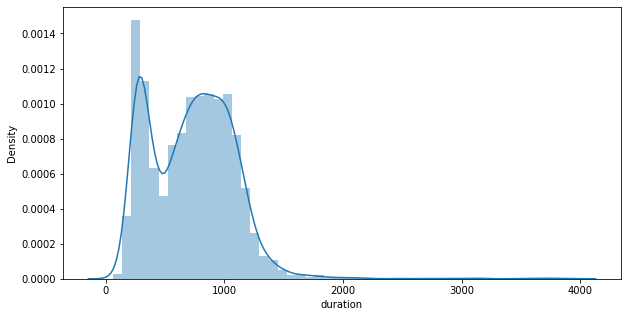

In [45]:
plt.figure(figsize=(10,5))
sns.distplot(df['duration'])

###The distribution of duration column is also rightly skewed.

##**Let's check the distribution of Talk_id column**

### Plotting Distplot of Talk_id column

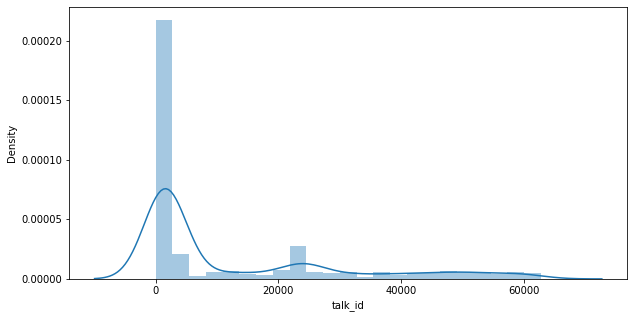

In [46]:
plt.figure(figsize=(10,5))
sns.distplot(df['talk_id'])

### The distribution of talk_id column is also rightly skewed.

#**4. Feature Engineering**

###Feature engineering is the process of using domain knowledge to extract features from row data .These features can be used to improve the performance of machine learning algorithms.

###**Feature Engineering on Speaker_1 column**

###**Let's perform target encoding on speaker_1 column and create a new column speaker_1_avg_views**

### Target encoding on speaker_1 column.

In [47]:
pop_speaker=df.groupby('speaker_1').agg({'views' : 'mean'}).sort_values(['views'],ascending=False)
pop_speaker=pop_speaker.to_dict()
pop_speaker=pop_speaker.values()
pop_speaker=  list(pop_speaker)[0]
df['speaker_1_avg_views']=df['speaker_1'].map(pop_speaker)

###Let's check the distribution of newly created column.

###Distribution of speaker_1_avg_views column


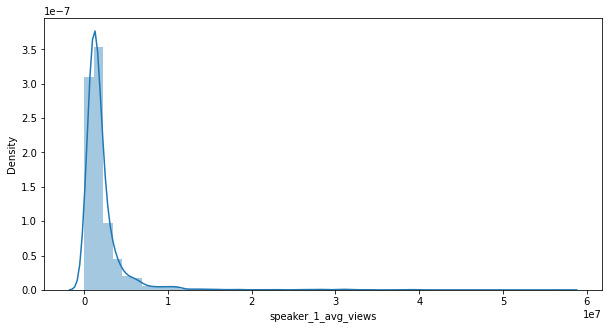

In [48]:
plt.figure(figsize=(10,5))
sns.distplot(df['speaker_1_avg_views'])

### We can see that the distribution of speaker_1_avg_views column is rightly skewed same as target variable.

##**Let's perform Feature Engineering on event column**
###**The event column contains lots of similar values so let's combine them in a same category.**

### Printing unique event categories.


In [49]:
event_list=list(df.event.unique())
print(event_list)

['TED2006', 'TED2004', 'TED2005', 'TEDGlobal 2005', 'TEDSalon 2006', 'TED2003', 'TED2007', 'TED2002', 'TEDGlobal 2007', 'TED2001', 'TEDSalon 2007 Hot Science', 'Skoll World Forum 2007', 'TED2008', 'TED1984', 'TED1990', 'DLD 2007', 'EG 2007', 'TED1998', 'LIFT 2007', 'TED Prize Wish', 'TEDSalon 2009 Compassion', 'Chautauqua Institution', 'Serious Play 2008', 'Taste3 2008', 'TED in the Field', 'TED2009', 'EG 2008', 'Elizabeth G. Anderson School', 'TEDxUSC', 'TED@State', 'TEDGlobal 2009', 'TEDxKC', 'TEDIndia 2009', 'TEDSalon London 2009', 'TEDxTC', 'TEDMED 2009', 'TEDxSMU', 'TEDxBoston 2009', 'TEDxBerlin', 'TED2010', 'TEDxAmsterdam', 'TEDxNASA', 'Mission Blue Voyage', 'TEDxPuget Sound', 'TEDxNYED', 'TEDSalon London 2010', 'TEDxEdmonton', 'TED@Cannes', 'TEDxAtlanta', 'TEDxEast', 'TEDxOilSpill', 'TEDGlobal 2010', 'TEDxBoston 2010', 'Business Innovation Factory', 'TEDxYYC', 'TEDxChange', 'TED Senior Fellows at TEDGlobal 2010', 'TEDxTelAviv 2010', 'TEDxDU 2010', 'TEDxMidwest', 'TEDxHouston', '

###Let's perform target encoding on event column and create a new column event_wise_avg_views

### Target encoding on event column

In [50]:
pop_event=df.groupby('event').agg({'views' : 'mean'}).sort_values(['views'],ascending=False)
pop_event=pop_event.to_dict()
pop_event=pop_event.values()
pop_event=  list(pop_event)[0]
df['event_wise_avg_views']=df['event'].map(pop_event)

###Let's check the distribution of newly created column.

### Distribution of event_wise_avg_views column

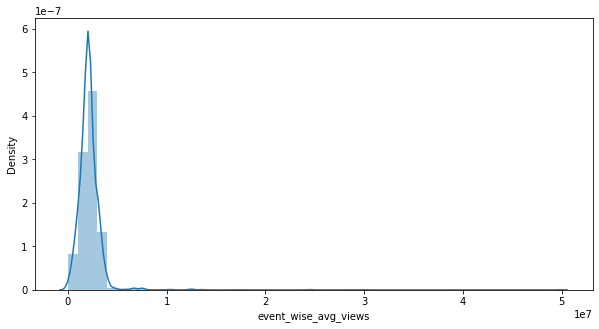

In [51]:
plt.figure(figsize=(10,5))
sns.distplot(df['event_wise_avg_views'])

##The distribution of event_wise_avg_views column is rightly skewed same as target variable.
Now, we can drop the event column now as it is of no use.

In [52]:
df=df.drop(columns='event')

#**Feature Engineering on available_lang column**

###**In available_lang column we have a list of available languages for each video.**

### Applying eval function on available_lang column

In [53]:
df['available_lang'] = df.apply(lambda row: eval(row['available_lang']), axis=1)

#####**Let's add a new feature 'num_of_lang' which contain the count of total no of language for a particular video.**

### Adding new feature num_of_lang

In [54]:
df['num_of_lang'] = df.apply(lambda x: len(x['available_lang']), axis=1)

##Now, we can drop available_lang column.

### Dropping the available_lang column

In [55]:
df.drop(columns='available_lang',inplace=True)

#**Feature Engineering on topics column**

###The topics column contains the list of topic tags associated with each video.
###we will add a new feature 'num_of_tags' which contain the count of total no of topics for a particular video.

In [56]:
df['topics'][0]

"['alternative energy', 'cars', 'climate change', 'culture', 'environment', 'global issues', 'science', 'sustainability', 'technology']"

### Applying Eval funcion on topics column

In [57]:
df['topics'] = df.apply(lambda row: eval(row['topics']), axis=1)

### Creating a new feature num_of_tags


In [58]:
df['num_of_tags'] = df.apply(lambda x: len(x['topics']), axis=1)

##**let's perform target encoding on topics column.**

### Extracting the unique topics from topics list of each talk


In [59]:
unique_topics=[]
for i in range(0,len(df)):
  temp=df['topics'][i]
  for ele in temp:
    if(ele not in unique_topics):
      unique_topics.append(ele)

###Extracting the avg views with respect to each topic in another dict unique_topics_avg_view_dict

In [60]:
unique_topics_avg_view_dict={}
for topic in unique_topics:
  temp=0
  count=0
  for i in range(0,len(df)):
    temp2=df['topics'][i]
    if(topic in temp2):
      temp+=df['views'][i]
      count+=1
  unique_topics_avg_view_dict[topic]=temp//count

### Storing the avg views with respect to topic for each talk


In [61]:
topics_wise_avg_views=[]
for i in range(0,len(df)):
  temp=0
  temp_topic=df['topics'][i]
  for ele in temp_topic:
    temp+=unique_topics_avg_view_dict[ele]
  
  topics_wise_avg_views.append(temp//len(temp_topic))

se = pd.Series(topics_wise_avg_views)
df['topics_wise_avg_views'] = se.values

### Distribution of topics_wise_avg_views


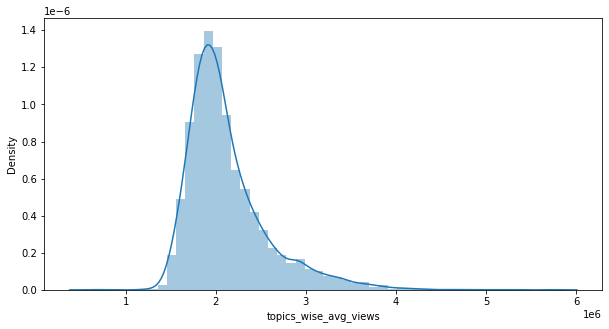

In [62]:
plt.figure(figsize=(10,5))
sns.distplot(df['topics_wise_avg_views'])

#**Feature Engineering on published_date column.**

##Let's create a new column called video_age which is the difference of current year and released year.

###Then we can drop published_date column.

### Adding new feature video_age

In [63]:
df['video_age']=2021-df['release_year']

### Now, drop published_date column

In [64]:
df=df.drop(columns='published_date')

#**Feature Engineering on related_talks column.**

####Related_talks column contains a dictionary with talk_id as key and video title as it's value.
####Then we will create a new feature related_views which contains mean of the views of related talks for each video .

### applying eval function on related_talks column

In [65]:
df['related_talks'] = df.apply(lambda row: eval(row['related_talks']), axis=1)

###Creating a new feature called related_views


In [66]:
df['related_views'] = 0

### Extracting the value of related_talks


In [67]:
for index, row in df.iterrows():
    id_list=list(row['related_talks'].keys())
    temp=0
    for i in range(len(df)):
      if (df.loc[i,'talk_id']) in id_list:
        temp+=df.loc[i,'views']

    df.loc[index,'related_views']=temp//6

###**checking the distribution of related_views column.**

### Distplot to show the distribution of related_views column

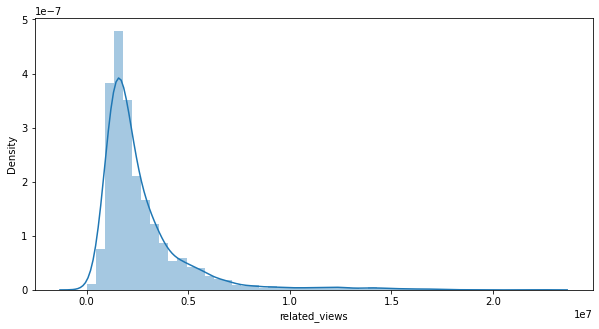

In [68]:
plt.figure(figsize=(10,5))
sns.distplot(df['related_views'])

### Here Related_views column is rightly skewed.

#**5. Data Cleaning**

##**5.1 Treating Nan values**

### Printing total number of missing values.

In [69]:
df.isnull().sum()

talk_id                    0
title                      0
speaker_1                  0
all_speakers               4
occupations              522
about_speakers           503
views                      0
recorded_date              1
native_lang                0
comments                 655
duration                   0
topics                     0
related_talks              0
url                        0
description                0
transcript                 0
release_day                0
release_month              0
release_year               0
speaker_1_avg_views        0
event_wise_avg_views       0
num_of_lang                0
num_of_tags                0
topics_wise_avg_views      0
video_age                  0
related_views              0
dtype: int64

###Firstly, let's drop some unimportant columns.

### Dropping unimportant columns from the dataframe.

In [70]:
df.drop(columns=['talk_id','title','speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'recorded_date','topics','related_talks','transcript','description','release_year','url','native_lang'],inplace=True)

### Now Printing total number of missing values.

In [71]:
df.isnull().sum()

views                      0
comments                 655
duration                   0
release_day                0
release_month              0
speaker_1_avg_views        0
event_wise_avg_views       0
num_of_lang                0
num_of_tags                0
topics_wise_avg_views      0
video_age                  0
related_views              0
dtype: int64

###after dropping we have null values only in comments column. So, let's impute them.

#**Now using KNNImputer for Imputing nan values of numerical columns .**

### Importing KNNImputer library to impute nan values

In [72]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()
imputer.fit(df[['comments']])
df[['comments']] = imputer.transform(df[['comments']])

### Let's see if there are any nan values in comments column

In [73]:
df[['comments']].isna().sum()

comments    0
dtype: int64

### finally we have removed all the null values from our numerical columns.

#**5.2 Outlier treatment**

### Printing total number of outliers

###Q1 - 1.5 * IQR = Lower Fence
###Q3 + 1.5 * IQR = Upper Fence

In [74]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

comments                 361
duration                  21
event_wise_avg_views     156
num_of_lang              121
num_of_tags              116
related_views            300
release_day                0
release_month              0
speaker_1_avg_views      373
topics_wise_avg_views    242
video_age                  0
views                    393
dtype: int64

### Now Replacing outliers with extreme values

In [75]:
for i in ['comments','duration','num_of_lang','num_of_tags','related_views','views','speaker_1_avg_views','topics_wise_avg_views','event_wise_avg_views']:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3 - Q1

  df[i]=np.where(df[i]<(Q1 - 1.5 * IQR),(Q1 - 1.5 * IQR),np.where(df[i]>(Q3 + 1.5 * IQR),(Q3 + 1.5 * IQR),df[i]))

### Let's check the outliers again

In [76]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

comments                 0
duration                 0
event_wise_avg_views     0
num_of_lang              0
num_of_tags              0
related_views            0
release_day              0
release_month            0
speaker_1_avg_views      0
topics_wise_avg_views    0
video_age                0
views                    0
dtype: int64

###Finally we have removed all outliers from our numerical columns.

#**6. Feature Selection**

###Let's separate the dependent and independent variables.

### Separating the dependent(y) and independent(X) variables


In [77]:
X=df.drop(columns='views')
y=df['views']